In [11]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots to be created

#Read in the data

df = pd.read_csv('/Users/danielbarirjensen/Desktop/Python/Datasets/movies.csv')

In [12]:
#View data snippet

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
#Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [14]:
#Drop missing values

df = df.dropna()

In [15]:
#Check data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
#Altering data types from float to int

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [17]:
#Replace year with correct release year

df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [26]:
#Sort by gross revenue
df.sort_values(by=['gross'], inplace = True, ascending = False)

In [19]:
#Set view to full dataset

pd.set_option('display.max_rows', None)

In [33]:
#Drop any duplicates
# df.drop_duplicates()

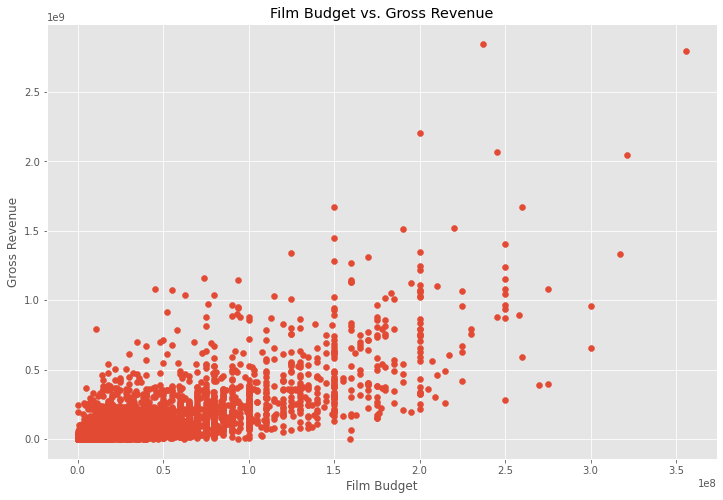

In [41]:
#Scatterplot for Budget vs. Gross Rev.

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Film Budget vs. Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

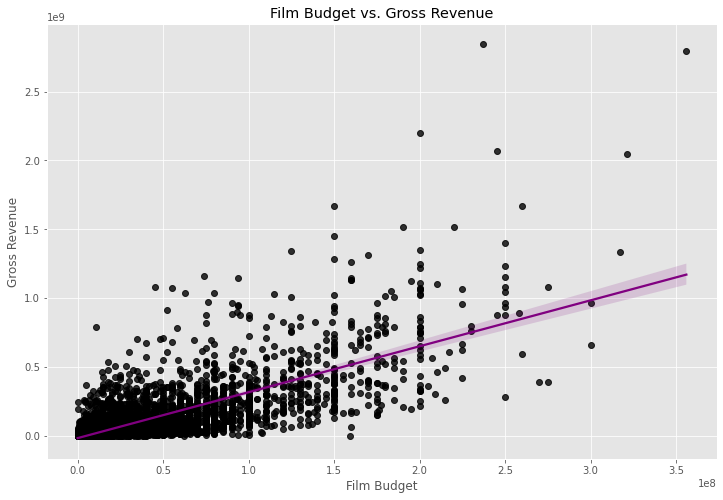

In [43]:
#Regression plot for Budget vs. Gross Rev. using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"black"},line_kws={"color":"purple"})
plt.title('Film Budget vs. Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

Text(87.0, 0.5, 'Movie Features')

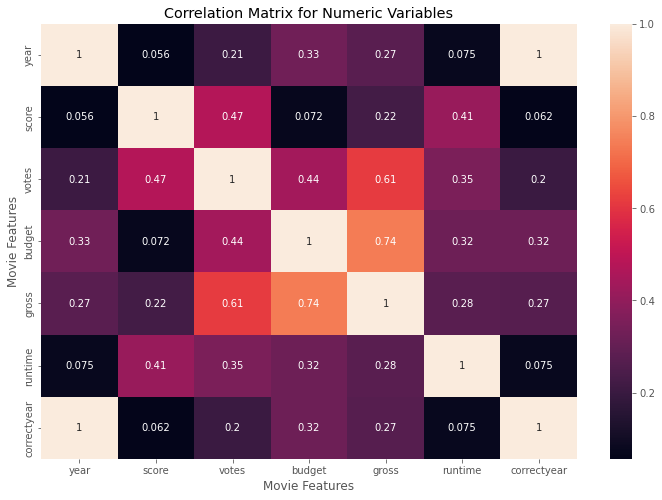

In [45]:
#Correlation matrix for numeric variables

corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [46]:
#Converting all variables to numeric

df_num = df
for col_name in df_num.columns:
    if df_num[col_name].dtype=='object':
        df_num[col_name]=df_num[col_name].astype('category')
        df_num[col_name]=df_num[col_name].cat.codes

In [47]:
#View snippet of updated table

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


Text(87.0, 0.5, 'Movie Features')

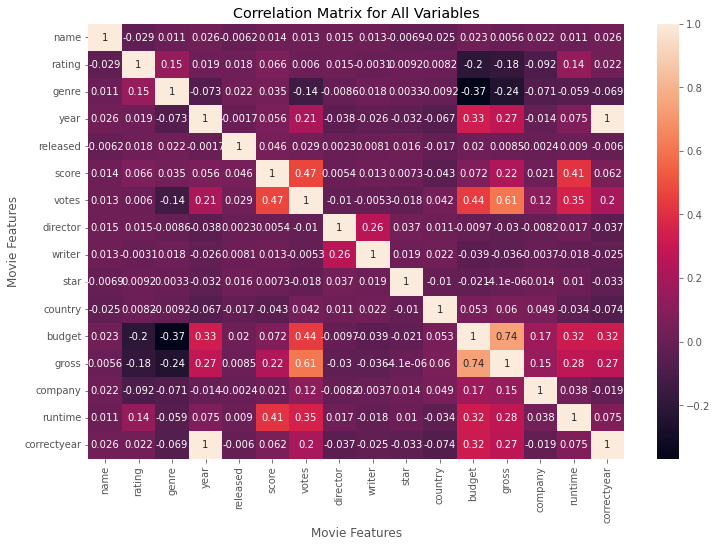

In [48]:
#Correlation matrix for all variables

full_corr_matrix = df.corr()
sns.heatmap(full_corr_matrix,annot=True)
plt.title('Correlation Matrix for All Variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [49]:
#View all variable pairs sorted by correlation

corr_pairs = full_corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
high_corr_pairs = sorted_corr_pairs[(sorted_corr_pairs)>0.5]
high_corr_pairs

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         correctyear    0.998726
correctyear  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [50]:
#Budget and votes have the highest positive correlation with gross revenue